In [3]:
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2

In [4]:
key_pts_frame = pd.read_csv('/content/P1_Facial_Keypoints/data/training_frames_keypoints.csv')

n = 0
image_name = key_pts_frame.iloc[n, 0]
key_pts = key_pts_frame.iloc[n, 1:].values
key_pts = key_pts.astype('float').reshape(-1, 2)

print('Image name: ', image_name)
print('Landmarks shape: ', key_pts.shape)
print('First 4 key pts: {}'.format(key_pts[:4]))

Image name:  Luis_Fonsi_21.jpg
Landmarks shape:  (68, 2)
First 4 key pts: [[ 45.  98.]
 [ 47. 106.]
 [ 49. 110.]
 [ 53. 119.]]


In [5]:
print('Number of images: ', key_pts_frame.shape[0])
key_pts_frame

Number of images:  3462


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,126,127,128,129,130,131,132,133,134,135
0,Luis_Fonsi_21.jpg,45.0,98.0,47.0,106.0,49.0,110.0,53.0,119.0,56.0,...,83.0,119.0,90.0,117.0,83.0,119.0,81.0,122.0,77.0,122.0
1,Lincoln_Chafee_52.jpg,41.0,83.0,43.0,91.0,45.0,100.0,47.0,108.0,51.0,...,85.0,122.0,94.0,120.0,85.0,122.0,83.0,122.0,79.0,122.0
2,Valerie_Harper_30.jpg,56.0,69.0,56.0,77.0,56.0,86.0,56.0,94.0,58.0,...,79.0,105.0,86.0,108.0,77.0,105.0,75.0,105.0,73.0,105.0
3,Angelo_Reyes_22.jpg,61.0,80.0,58.0,95.0,58.0,108.0,58.0,120.0,58.0,...,98.0,136.0,107.0,139.0,95.0,139.0,91.0,139.0,85.0,136.0
4,Kristen_Breitweiser_11.jpg,58.0,94.0,58.0,104.0,60.0,113.0,62.0,121.0,67.0,...,92.0,117.0,103.0,118.0,92.0,120.0,88.0,122.0,84.0,122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3457,Thomas_Ferguson_02.jpg,35.0,94.0,35.0,105.0,38.0,112.0,40.0,123.0,46.0,...,71.0,123.0,79.0,121.0,71.0,123.0,66.0,126.0,64.0,126.0
3458,Valerie_Harper_00.jpg,72.0,133.0,76.0,147.0,80.0,159.0,87.0,170.0,91.0,...,120.0,156.0,135.0,159.0,124.0,163.0,117.0,167.0,113.0,166.0
3459,Maggie_Smith_00.jpg,52.0,149.0,56.0,160.0,63.0,168.0,71.0,179.0,78.0,...,122.0,169.0,133.0,169.0,122.0,172.0,115.0,172.0,111.0,172.0
3460,Erin_Hershey_Presley_41.jpg,82.0,91.0,82.0,105.0,82.0,116.0,86.0,128.0,90.0,...,119.0,132.0,134.0,136.0,119.0,139.0,112.0,139.0,108.0,139.0


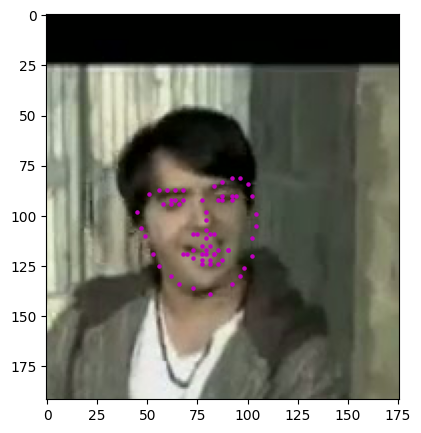

In [6]:
def show_keypoints(image, key_pts):
    """Show image with keypoints"""
    plt.imshow(image)
    plt.scatter(key_pts[:, 0], key_pts[:, 1], s=20, marker='.', c='m')

n = 0
image_name = key_pts_frame.iloc[n, 0]
key_pts = key_pts_frame.iloc[n, 1:].values
key_pts = key_pts.astype('float').reshape(-1, 2)

plt.figure(figsize=(5, 5))
show_keypoints(mpimg.imread(os.path.join('data/training/', image_name)), key_pts)
plt.show()

In [7]:
from torch.utils.data import Dataset, DataLoader

class FacialKeypointsDataset(Dataset):


    def __init__(self, csv_file, root_dir, transform=None):

        self.key_pts_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.key_pts_frame)

    def __getitem__(self, idx):
        image_name = os.path.join(self.root_dir,
                                self.key_pts_frame.iloc[idx, 0])

        image = mpimg.imread(image_name)

        # if image has an alpha color channel, get rid of it
        if(image.shape[2] == 4):
            image = image[:,:,0:3]

        key_pts = self.key_pts_frame.iloc[idx, 1:].values
        key_pts = key_pts.astype('float').reshape(-1, 2)
        sample = {'image': image, 'keypoints': key_pts}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [8]:
face_dataset = FacialKeypointsDataset(csv_file='data/training_frames_keypoints.csv',
                                      root_dir='data/training/')
print('Length of dataset: ', len(face_dataset))

Length of dataset:  3462


0 (171, 197, 3) (68, 2)
1 (204, 163, 3) (68, 2)
2 (196, 157, 3) (68, 2)


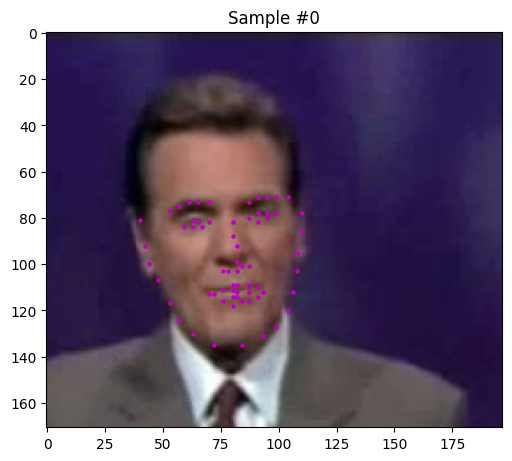

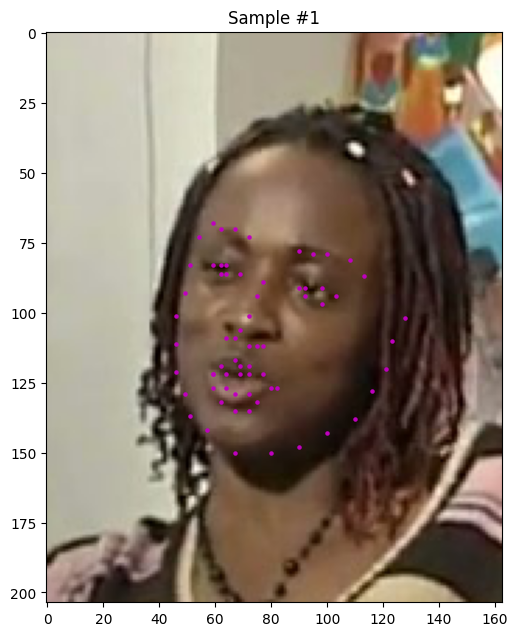

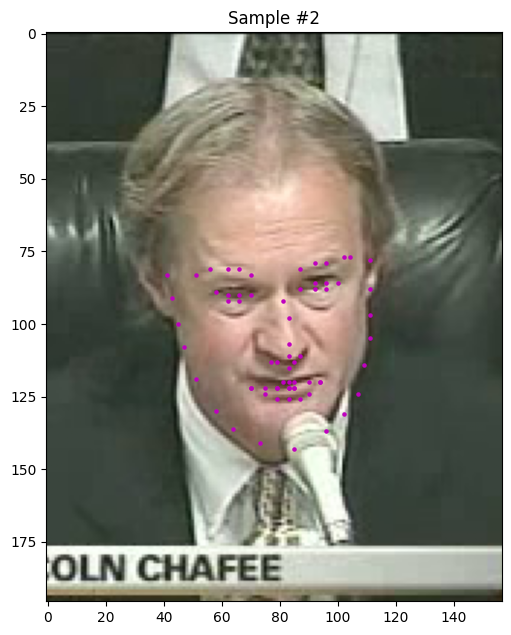

In [9]:
num_to_display = 3

for i in range(num_to_display):
    fig = plt.figure(figsize=(20,10))

    rand_i = np.random.randint(0, len(face_dataset))
    sample = face_dataset[rand_i]

    print(i, sample['image'].shape, sample['keypoints'].shape)

    ax = plt.subplot(1, num_to_display, i + 1)
    ax.set_title('Sample #{}'.format(i))

    show_keypoints(sample['image'], sample['keypoints'])

In [10]:
import torch
from torchvision import transforms, utils

class Normalize(object):


    def __call__(self, sample):
        image, key_pts = sample['image'], sample['keypoints']

        image_copy = np.copy(image)
        key_pts_copy = np.copy(key_pts)

        # convert image to grayscale
        image_copy = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        # scale color range from [0, 255] to [0, 1]
        image_copy=  image_copy/255.0

        # scale keypoints to be centered around 0 with a range of [-1, 1]
        # mean = 100, sqrt = 50, so, pts should be (pts - 100)/50
        key_pts_copy = (key_pts_copy - 100)/50.0


        return {'image': image_copy, 'keypoints': key_pts_copy}

class Rescale(object):


    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, key_pts = sample['image'], sample['keypoints']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = cv2.resize(image, (new_w, new_h))

        # scale the pts, too
        key_pts = key_pts * [new_w / w, new_h / h]

        return {'image': img, 'keypoints': key_pts}

class RandomCrop(object):


    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, key_pts = sample['image'], sample['keypoints']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        key_pts = key_pts - [left, top]

        return {'image': image, 'keypoints': key_pts}

class ToTensor(object):


    def __call__(self, sample):
        image, key_pts = sample['image'], sample['keypoints']

        # if image has no grayscale color channel, add one
        if(len(image.shape) == 2):
            # add that third color dim
            image = image.reshape(image.shape[0], image.shape[1], 1)

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image.transpose((2, 0, 1))

        return {'image': torch.from_numpy(image),
                'keypoints': torch.from_numpy(key_pts)}

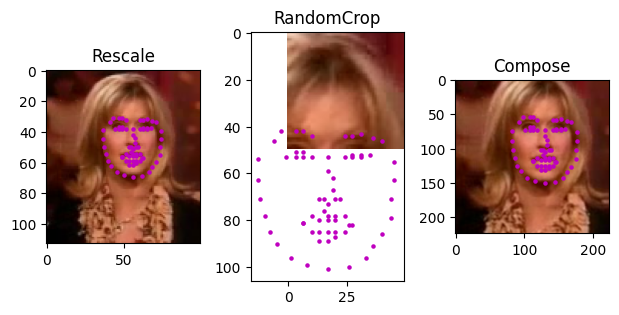

In [11]:
rescale = Rescale(100)
crop = RandomCrop(50)
composed = transforms.Compose([Rescale(250),
                               RandomCrop(224)])

# apply the transforms to a sample image
test_num = 500
sample = face_dataset[test_num]

fig = plt.figure()
for i, tx in enumerate([rescale, crop, composed]):
    transformed_sample = tx(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tx).__name__)
    show_keypoints(transformed_sample['image'], transformed_sample['keypoints'])

plt.show()

In [12]:
data_transform = transforms.Compose([Rescale(250),
                                     RandomCrop(224),
                                     Normalize(),
                                     ToTensor()])

# create the transformed dataset
transformed_dataset = FacialKeypointsDataset(csv_file='data/training_frames_keypoints.csv',
                                             root_dir='data/training/',
                                             transform=data_transform)

In [13]:
print('Number of images: ', len(transformed_dataset))

# make sure the sample tensors are the expected size
for i in range(5):
    sample = transformed_dataset[i]
    print(i, sample['image'].size(), sample['keypoints'].size())

Number of images:  3462
0 torch.Size([1, 224, 224]) torch.Size([68, 2])
1 torch.Size([1, 224, 224]) torch.Size([68, 2])
2 torch.Size([1, 224, 224]) torch.Size([68, 2])
3 torch.Size([1, 224, 224]) torch.Size([68, 2])
4 torch.Size([1, 224, 224]) torch.Size([68, 2])


In [14]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [56]:
## TODO: define the convolutional neural network architecture

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as I
import torchvision.models as models


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()


        self.resnet50 = models.resnet50(pretrained=True)


        for param in self.resnet50.parameters():
            param.requires_grad = False
        self.resnet50.fc.requires_grad = True

        # Replace the final classification layer to output 136 keypoints
        self.resnet50.fc = nn.Linear(2048, 136)
        # self.resnet50.fc = nn.Sequential(
        #     nn.Linear(2048, 256),
        #     nn.ReLU(inplace=True),
        #     nn.Dropout(0.5),
        #     nn.Linear(256, 136)
        # )

    def forward(self, x):

        x = torch.cat((x, x, x), dim=1)
        x = self.resnet50(x)

        return x

net = Net().to(device)
print(net)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Net(
  (resnet50): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0)

In [35]:
data_transform = transforms.Compose([Rescale(250),
                                    RandomCrop(224),
                                    Normalize(),
                                    ToTensor()])


assert(data_transform is not None), 'Define a data_transform'

In [36]:
transformed_dataset = FacialKeypointsDataset(csv_file='/content/P1_Facial_Keypoints/data/training_frames_keypoints.csv',
                                             root_dir='/content/P1_Facial_Keypoints/data/training',
                                             transform=data_transform)


print('Number of images: ', len(transformed_dataset))
for i in range(4):
    sample = transformed_dataset[i]
    print(i, sample['image'].size(), sample['keypoints'].size())


Number of images:  3462
0 torch.Size([1, 224, 224]) torch.Size([68, 2])
1 torch.Size([1, 224, 224]) torch.Size([68, 2])
2 torch.Size([1, 224, 224]) torch.Size([68, 2])
3 torch.Size([1, 224, 224]) torch.Size([68, 2])


In [37]:
batch_size = 10

train_loader = DataLoader(transformed_dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=4)

test_dataset = FacialKeypointsDataset(csv_file='/content/P1_Facial_Keypoints/data/test_frames_keypoints.csv',
                                             root_dir='/content/P1_Facial_Keypoints/data/test',
                                             transform=data_transform)

batch_size = 10

test_loader = DataLoader(test_dataset,
                          batch_size=batch_size,
                          shuffle=False,
                          num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [38]:
def net_sample_output():


    for i, sample in enumerate(test_loader):

        # get sample data: images and ground truth keypoints
        images = sample['image']
        key_pts = sample['keypoints']


        images = images.type(torch.FloatTensor).to(device)


        output_pts = net(images)


        output_pts = output_pts.view(output_pts.size()[0], 68, -1)


        if i == 0:
            return images, output_pts, key_pts

In [39]:
test_images, test_outputs, gt_pts = net_sample_output()


print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


torch.Size([1, 224, 224])
torch.Size([1, 224, 224])
torch.Size([1, 224, 224])
torch.Size([1, 224, 224])
torch.Size([1, 224, 224])
torch.Size([1, 224, 224])
torch.Size([1, 224, 224])
torch.Size([1, 224, 224])
torch.Size([1, 224, 224])
torch.Size([1, 224, 224])


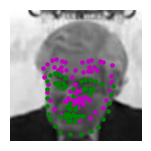

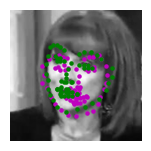

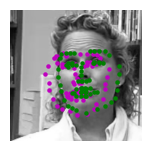

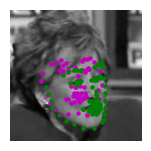

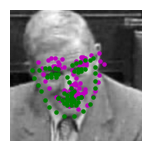

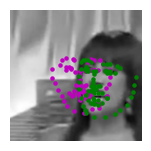

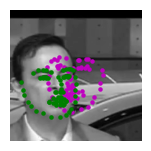

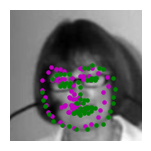

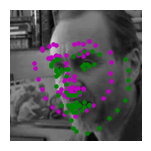

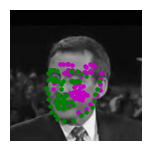

In [88]:
def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    """Show image with predicted keypoints"""

    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')

    if gt_pts is not None:
        plt.scatter(gt_pts[:, 0], gt_pts[:, 1], s=20, marker='.', c='g')

def visualize_output(test_images, test_outputs, gt_pts=None, batch_size=10):

    for i in range(batch_size):
        plt.figure(figsize=(20,10))
        ax = plt.subplot(1, batch_size, i+1)


        image = test_images[i].data.cpu()   # get the image from it's Variable wrapper
        image = image.numpy()   # convert to numpy array from a Tensor
        image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image
        img_new = test_images[i].data.cpu()



        predicted_key_pts = test_outputs[i].data.cpu()
        predicted_key_pts = predicted_key_pts.numpy()
        # undo normalization of keypoints
        predicted_key_pts = predicted_key_pts*50.0+100


        ground_truth_pts = None
        if gt_pts is not None:
            ground_truth_pts = gt_pts[i]
            ground_truth_pts = ground_truth_pts*50.0+100

        # call show_all_keypoints
        show_all_keypoints(np.squeeze(image), predicted_key_pts, ground_truth_pts)

        plt.axis('off')
        print(img_new.shape)

    plt.show()


visualize_output(test_images, test_outputs, gt_pts)

In [57]:
import torch.optim as optim

criterion = nn.MSELoss()

optimizer = optim.Adam(net.parameters(), lr = 0.0001)

In [50]:
def train_net(n_epochs):

    loss_over_time = []


    net.train()

    for epoch in range(n_epochs):  # loop over the dataset multiple times

        running_loss = 0.0

        # train on batches of data, assumes you already have train_loader
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            images = data['image']
            key_pts = data['keypoints']

            # flatten pts
            key_pts = key_pts.view(key_pts.size(0), -1)

            # convert variables to floats for regression loss
            key_pts = key_pts.type(torch.FloatTensor).to(device)
            images = images.type(torch.FloatTensor).to(device)

            # forward pass to get outputs
            output_pts = net(images)

            # calculate the loss between predicted and target keypoints
            loss = criterion(output_pts, key_pts)

            # zero the parameter (weight) gradients
            optimizer.zero_grad()

            # backward pass to calculate the weight gradients
            loss.backward()

            # update the weights
            optimizer.step()

            # print loss statistics
            running_loss += loss.item()
            if batch_i % 10 == 9:    # print every 10 batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/10))
                running_loss = 0.0
    print('Finished Training')
    return loss_over_time


In [63]:
n_epochs = 40 # start small, and increase when you've decided on your model structure and hyperparams

train_net(n_epochs)

Epoch: 1, Batch: 10, Avg. Loss: 0.0787589706480503
Epoch: 1, Batch: 20, Avg. Loss: 0.12183350473642349
Epoch: 1, Batch: 30, Avg. Loss: 0.09949052333831787
Epoch: 1, Batch: 40, Avg. Loss: 0.10138553716242313
Epoch: 1, Batch: 50, Avg. Loss: 0.10985435098409653
Epoch: 1, Batch: 60, Avg. Loss: 0.09813496172428131
Epoch: 1, Batch: 70, Avg. Loss: 0.11179261654615402
Epoch: 1, Batch: 80, Avg. Loss: 0.09963238388299941
Epoch: 1, Batch: 90, Avg. Loss: 0.10114059634506703
Epoch: 1, Batch: 100, Avg. Loss: 0.12112402021884919
Epoch: 1, Batch: 110, Avg. Loss: 0.10867496319115162
Epoch: 1, Batch: 120, Avg. Loss: 0.16948355101048945
Epoch: 1, Batch: 130, Avg. Loss: 0.09599667377769946
Epoch: 1, Batch: 140, Avg. Loss: 0.09851616360247135
Epoch: 1, Batch: 150, Avg. Loss: 0.0958335604518652
Epoch: 1, Batch: 160, Avg. Loss: 0.09637530371546746
Epoch: 1, Batch: 170, Avg. Loss: 0.13348763734102248
Epoch: 1, Batch: 180, Avg. Loss: 0.10900191478431225
Epoch: 1, Batch: 190, Avg. Loss: 0.09042190089821815
Epoc

[]

In [59]:
test_images, test_outputs, gt_pts = net_sample_output()

print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


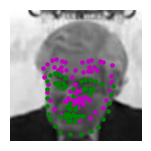

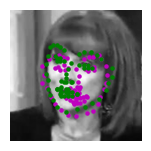

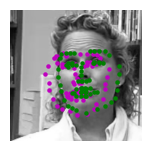

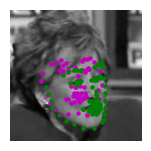

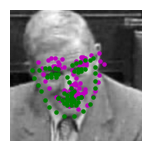

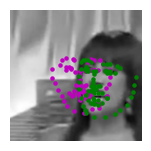

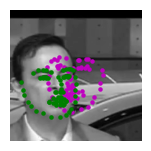

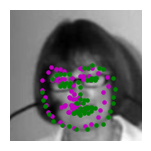

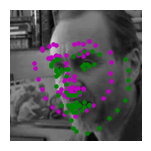

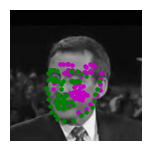

In [64]:
visualize_output(test_images, test_outputs, gt_pts)

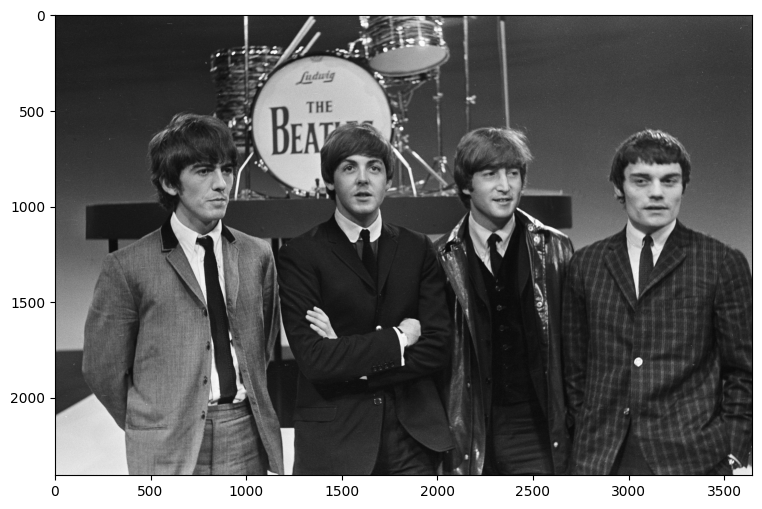

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import cv2

image = cv2.imread('images/the_beatles.jpg')
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image_RGB)

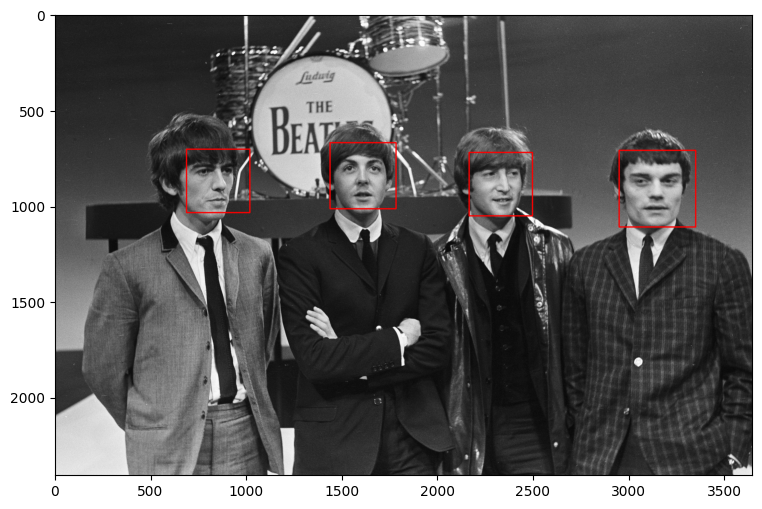

In [66]:
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(image, scaleFactor=1.3, minNeighbors=5, minSize=(200, 200))

image_with_detections = image_RGB.copy()
# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # print(w)
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),5)
    roi_gray = image_gray[y:y+h, x:x+w]
    roi_color = image_RGB[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_color)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),5)
fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)

In [97]:
def show_all_keypoints_new(image, predicted_key_pts, gt_pts=None):
    """Show image with predicted keypoints"""

    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')

    if gt_pts is not None:
        plt.scatter(gt_pts[:, 0], gt_pts[:, 1], s=20, marker='.', c='g')

def visualize_output_new(image_test, predicted_key_pts_test, gt_pts=None, batch_size=10):

  #  for i in range(batch_size):

    plt.figure(figsize=(20,10))
    image=image_test[0].data.cpu()
    # un-transform the predicted key_pts data


    # un-transform the image data
    image = image.numpy()   # convert to numpy array from a Tensor
    print(image.shape)
    image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image

    # un-transform the predicted key_pts data
    predicted_key_pts =predicted_key_pts_test[0].data.cpu()
    predicted_key_pts = predicted_key_pts.numpy()
    # undo normalization of keypoints
    predicted_key_pts = predicted_key_pts*50+100


    # call show_all_keypoints
    show_all_keypoints_new(np.squeeze(image), predicted_key_pts)



    plt.show()

(1, 224, 224)


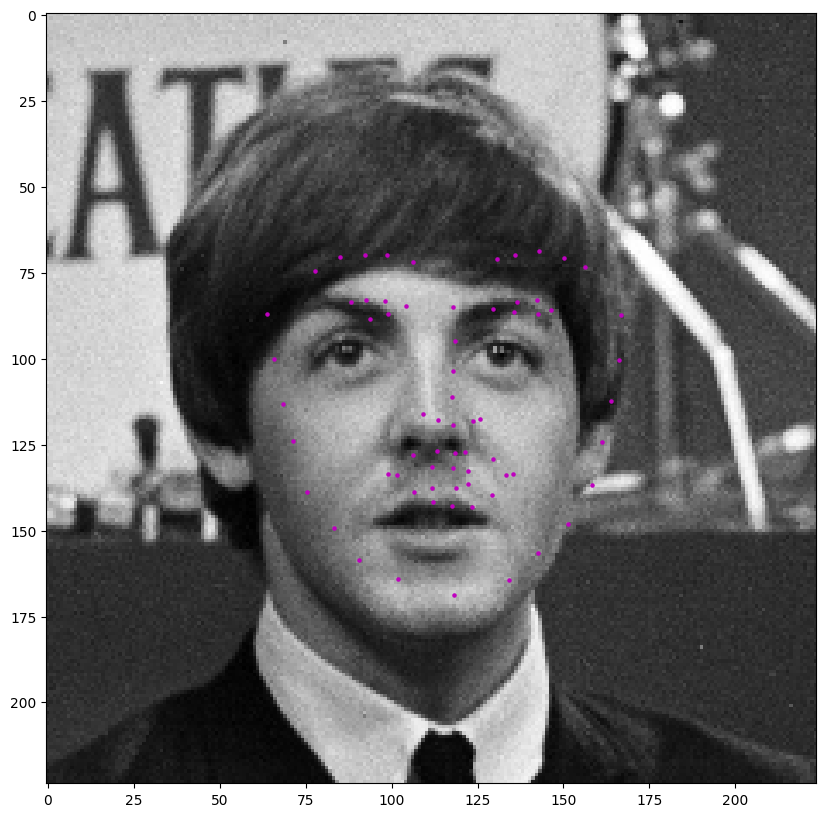

(1, 224, 224)


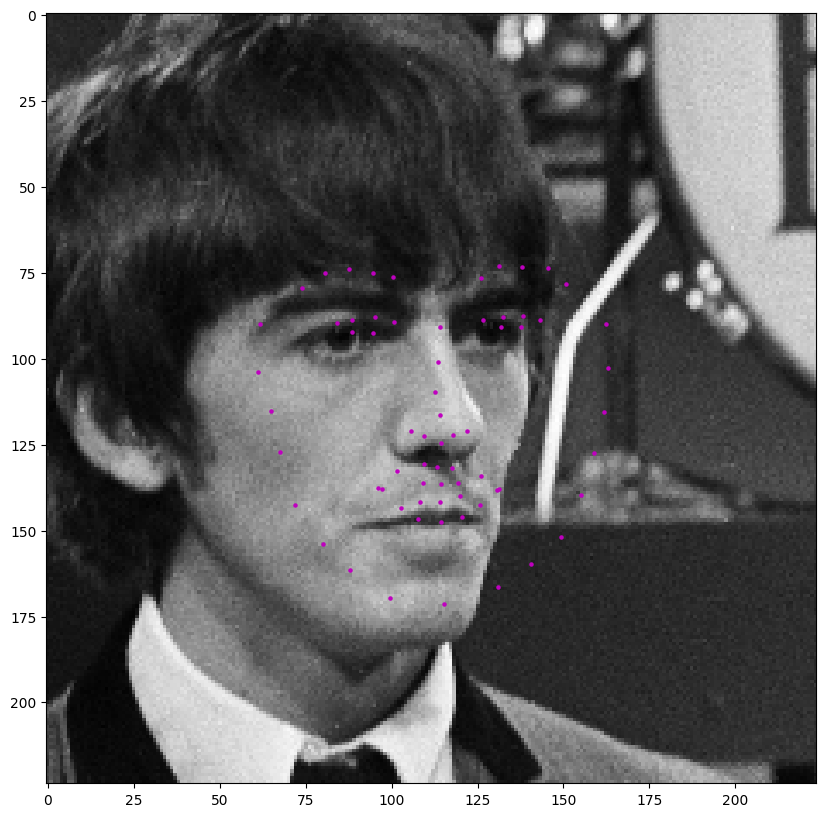

(1, 224, 224)


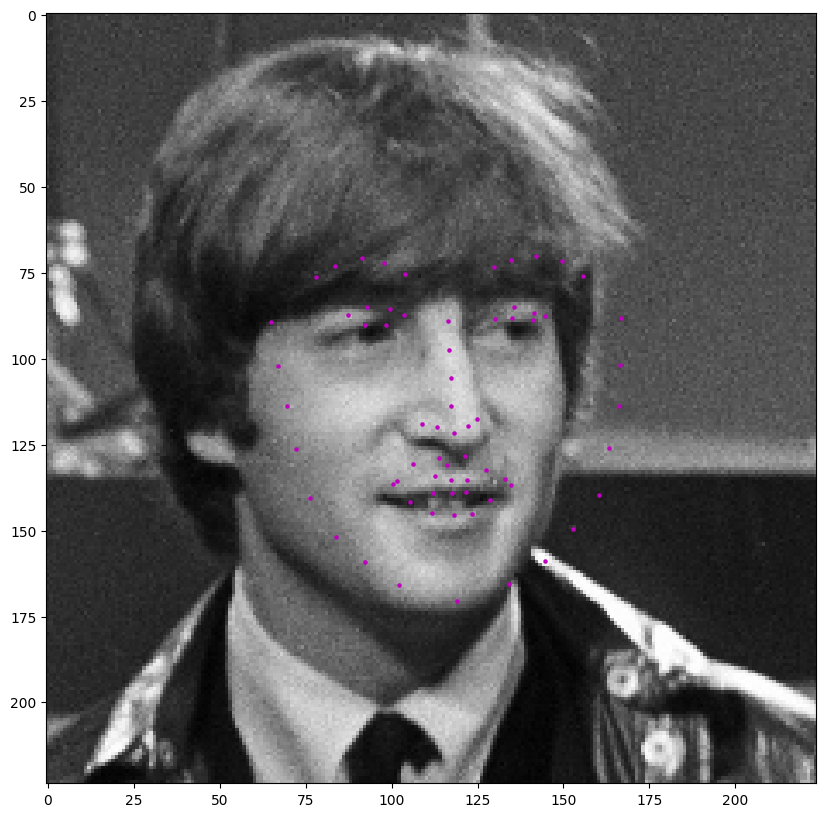

(1, 224, 224)


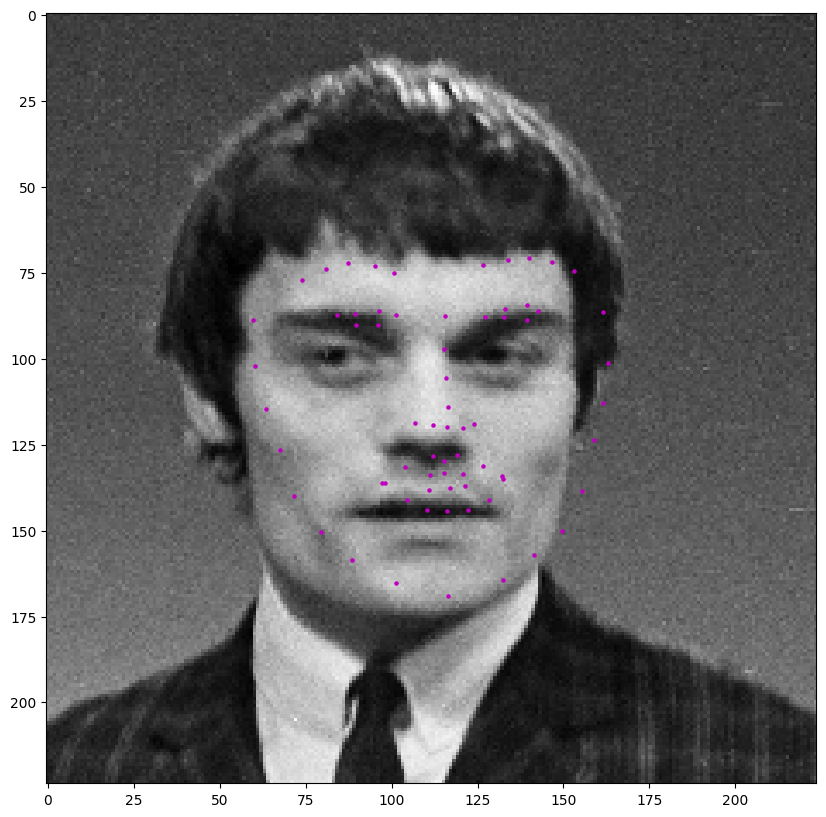

In [98]:
image_copy = np.copy(image)

# loop over the detected faces from your haar cascade
for (x,y,w,h) in faces:
    # Select the region of interest that is the face in the image
    #roi = image_copy[y-100:y+h+100, x-100:x+w+100]
    roi = image_copy[y-150:y+h+150, x-150:x+w+150]
    ## TODO: Convert the face region from RGB to grayscale
    roi=cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)

    roi=roi/255.0

    new_w=224
    new_h=224
    roi = cv2.resize(roi, (new_w, new_h))

    # add that third color dim
    roi = roi.reshape(roi.shape[0], roi.shape[1], 1)
    roi = roi.transpose((2, 0, 1))
    roiT=torch.from_numpy(roi)

    roiT = roiT.type(torch.FloatTensor)

    roiT.unsqueeze_(0)
    roiT = roiT.to(device)
    output_pts = net(roiT)
    output_pts = output_pts.view(output_pts.size()[0], 68, -1)
    # print("roiT shape:", roiT.shape)




    visualize_output_new(roiT, output_pts)
